In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Within Chapter Exercises  
### Exercise 3.1  
**If one substitutes y = μ and σ = 0.1 in Eq. (3.2), one finds p(y) = 3.99. How can a probability be larger than 1? If the answer to this question is not immediately clear, read Section B.5.4, on the difference between probability mass and density functions.**  

Equation 3.2: 
$$ p(y) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y-\mu)^2}{2\sigma^2}} $$

This is because it is not a probability, it is a probability density. The probability at any given value of $y$ is 0, however, the density is not. In order to calculate the probability, we would need to integrate over some range of this probability density. A probability density will have an integral equal to one, but the density at any given point can be greater or less than one.

---
### Exercise 3.2  
**Prove that statement mathematically.**

From the textbook:  
The expression of the posterior mean is of the form:
$$wx_{obs} + (1-w)\mu$$
$$\textrm{where}$$
$$w = \frac{J}{J+J_s}$$
Since $J$ and $J_s$ are both non-negative, w is a number between 0 and 1.

Answer:  
Let's start with the two extremes. When $w=0$, the posterior mean is equal to $\mu$, while when $w=1$, the posterior mean is equal to $x_{obs}$. This effectively sets our upper and lower bounds for the posterior mean, and therefore, the mean will always lie between these upper and lower bounds, which are equal to $x_{obs}$ and $\mu$.


---
### Exercise 3.3   
**In the special case that prior and likelihood have the same variance (σ = σs), compute the mean of the posterior.**   
For the following, $x_{obs}$ and $\mu$ are equal to the likelihood and prior means respectively.  

When the variance is equal between the prior and the likelihood, the posterior mean will be exactly in the middle. The posterior mean is determined by the weights given to the mean of the likelihood and prior, and these weights are $w$ and $1-w$, where $w=\frac{J}{J+J_s}$. Since the variance is equal, the precision ($J$) is also equal, which makes $w=0.5$. Therefore, the posterior mean can be calculated as:
$$\mu_{post} = 0.5x_{obs} + (1-0.5)\mu$$
Therefore, the posterior mean is the just the average of the prior and likelihood mean, and would fall right in the middle of the likelihood mean and prior mean.

We can also show this using the the precision notation.
$$\mu_{post} = \frac{Jx_{obs} + J_s\mu}{J + J_s}$$
if $J = J_s$ then we can simplify to:
$$\mu_{post} = \frac{J(x_{obs} + \mu)}{2J}$$
Which further simplifies to
$$\mu_{post} = \frac{(x_{obs} + \mu)}{2}$$


---
### Exercise 3.5   

**What is the variance of the posterior in the special case that σ = σs? What are the mean and the variance of the posterior when σ σs is very large or very small? Interpret your results.**   

Since:
$$\sigma_{post}^2 = \frac{1}{\frac{1}{\sigma^2}+\frac{1}{\sigma_s^2}}$$
$$\textrm{and}$$ 
$$\sigma^2 = \sigma_s^2$$
$$\sigma_{post}^2 = \frac{1}{\frac{2}{\sigma}}$$
Which then can be simplified to:
$$\sigma_{post}^2 = \frac{\sigma^2}{2}$$
Therfore, when $\sigma=\sigma_s$ the posterior variance will be equal to exaclty half of the prior or likelihood variance.  

When the ratio $\frac{\sigma}{\sigma_s}$ is very large, it means the measurement (likelihood) has a very high variance relative to our prior, and our posterior mean will be heavilyy biased towards the prior mean. In the opposite case, when ratio $\frac{\sigma}{\sigma_s}$ is very small, the prior has a very high variance relative to the measurement (likelihood) (in the extreme case the prior may be uniform), and our posterior mean will be heavily biased towards our likelihood mean. Assuming both the prior and likelihood are gaussian, the posterior variance will be smaller than either the likelihood or prior, as this is the result of multiplying two gaussian distributions. If we use precision notation this becomes more clear:
if we let $P$ be the precision:

$$P_{posterior} = P_{likelihood} + P_{prior}$$

Since the precision will always be a positive number, we can see that that the posterior precision will be higher than either the likelihood or the prior, indicating a lower variance as precision is the inverse of variance.

---
# End of chapter problems  
### Problem 3.1
**Let s be the stimulus of interest, x the measurement, ps(s) the stimulus distribution, and px|s(x|s) the measurement distribution.**   

**a) Write down the posterior distribution over hypothesized stimulus s, given an observed measurement xobs.**   
$$P(s_{hyp}|x_{obs}) = \frac{p(x_{obs}|s_{hyp})p(s_{hyp})}{p(x_{obs})}$$

**b) Which of the terms in your expression is called the likelihood function?**  
The likelihood function in the above expression is $p(x_{obs}|s_{hyp})$ 

**c) What is the difference between the likelihood function and the measurement distribution?**   
The measurement distribution is the distribution of the measurement $x$ for a given stimulus ($s$) value. It is a conditional probability regarding the probability of a measurement give the stimuluis, when that stimulus is repeated many times. This would be an example of an objective probability. The likelihood function is also a conditional probability, but it represents the observer's belief about the stimulus given the measurement. This would be an example of a subjective probability.




---
### Problem 3.2
**In this problem, we numerically calculate a posterior distribution. Suppose the stimulus distribution $p_s(s)$ is Gaussian with mean 20 and standard deviation 4. The measurement distribution $p_{x|s}(x|s)$ is Gaussian with standard deviation $σ = 5$. A Bayesian observer infers $s$ from an observed measurement $x_{obs} = 30$. We are now going to calculate the posterior probability density using numerical methods.**  
a) Define a vector of hypothesized stimulus values s: (0, 0.2, 0.4, . . . , 40).  
b) Compute the likelihood function and the prior on this vector of s values.  
c) Multiply the likelihood and the prior pointwise.  
d) Divide this product by its sum over all s (normalization step).  
e) Convert this posterior probability mass function into a probability density function by dividing by the step size you used in your vector of s values (e.g., 0.2).  
f) Plot the likelihood, prior, and posterior in the same plot.  
g) Is the posterior wider or narrower than likelihood and prior? Do you expect this based on the equations we discussed?  
h) Change the standard deviation of the measurement distribution to a large value. What happens to the posterior? Can you explain this?  
i) Change the standard deviation of the measurement distribution to a small value. What happens to the posterior? Can you explain this?

Equations
$$p(s|x) = \frac{p(x|s)p(s)}{p(x)}$$

### Gaussian Function and equation 
$$ p(y) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y-\mu)^2}{2\sigma^2}} $$

In [3]:
def gaussian_pdf(y, mu, sigma):
    # Constant calculation
    const = 1 / (np.sqrt(2 * np.pi * (sigma**2)))
    # Exponential calculation
    exp = np.exp(-(((y - mu) ** 2) / (2 * (sigma ** 2))))
    return const * exp



**Steps A and B**  
Note: The problem said to use 40 as the upper limit of the hypothesized values of S, however, this resulted in a likelihood function that did not come back down close to zero, so I extended it to 50.

In [4]:
x_obs = 30
s = np.arange(0, 50.2, 0.2) 
likelihood = [gaussian_pdf(x_obs, x, 5) for x in s]
prior = gaussian_pdf(s, 20, 4)


**Step C to F**

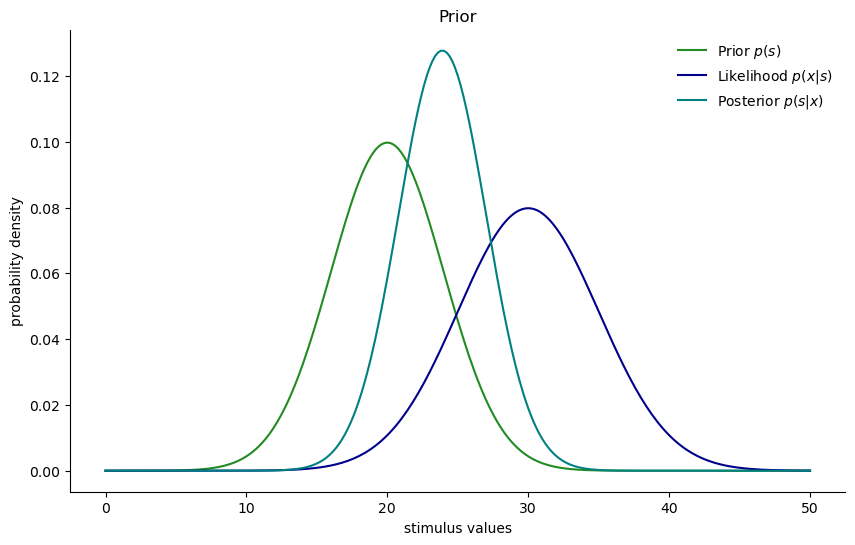

In [5]:
# Step C
protoposterior = prior * likelihood
# Step F
posterior = protoposterior / np.sum(protoposterior)
# Step E
posterior /= 0.2
# Step F
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(s, prior, color='forestgreen', label="Prior $p(s)$")
ax.plot(s, likelihood, color='darkblue', label="Likelihood $p(x|s)$")
ax.plot(s, posterior, color='teal', label="Posterior $p(s|x)$")
ax.set_xlabel('stimulus values')
ax.set_ylabel('probability density')
ax.set_title('Prior')
ax.legend(frameon=False)
sns.despine()



**G**  
The posterior is narrower than the likelihood and the prior. This is to be expected as the posterior variance will always be lower than the prior and likelihood variance. This is because when we multiply two gaussian functions, the resultant gaussian always has a lower variance.  

**H**  
Recalculate the values and plot the distributions again below.

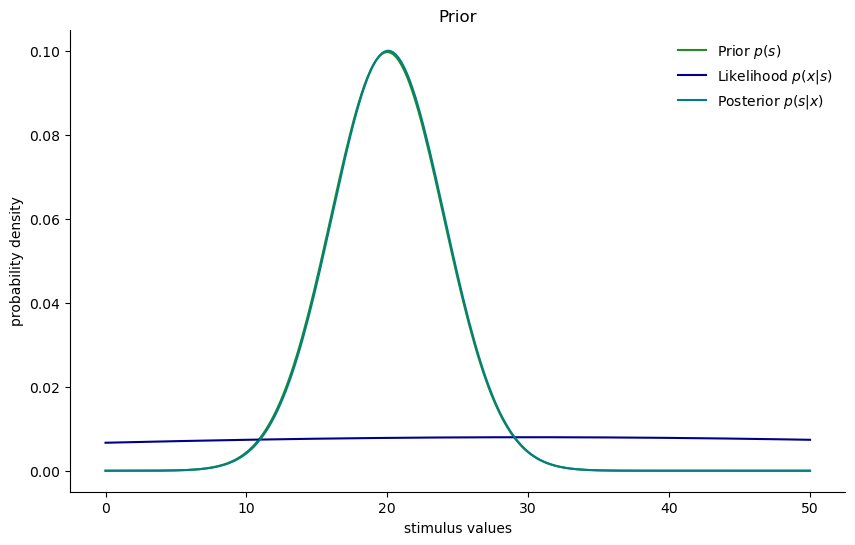

In [6]:
x_obs = 30
s = np.arange(0, 50.2, 0.2) 
likelihood = [gaussian_pdf(x_obs, x, 50) for x in s]
prior = gaussian_pdf(s, 20, 4)

# Step C
protoposterior = prior * likelihood
# Step F
posterior = protoposterior / np.sum(protoposterior)
# Step E
posterior /= 0.2
# Step F
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(s, prior, color='forestgreen', label="Prior $p(s)$")
ax.plot(s, likelihood, color='darkblue', label="Likelihood $p(x|s)$")
ax.plot(s, posterior, color='teal', label="Posterior $p(s|x)$")
ax.set_xlabel('stimulus values')
ax.set_ylabel('probability density')
ax.set_title('Prior')
ax.legend(frameon=False)
sns.despine()

When the likelihood variance becomes very high, the posterior becomes almost identical to the prior. This is because the mean of the posterior is the weighted average of the prior and likelihood, and with a high variance in the likelihood, the weighted average is heavily biased towards the prior. The variance of the posterior will be very similar to the prior. It is easier to explain this as precision, as the posterior precision is the sum of the prior and likelihood precicions, since the likelihood precision would be very close to zero, the posterior precision will be very close the prior precision.

**I**  
Recalculate the values and plot the distributions again below.

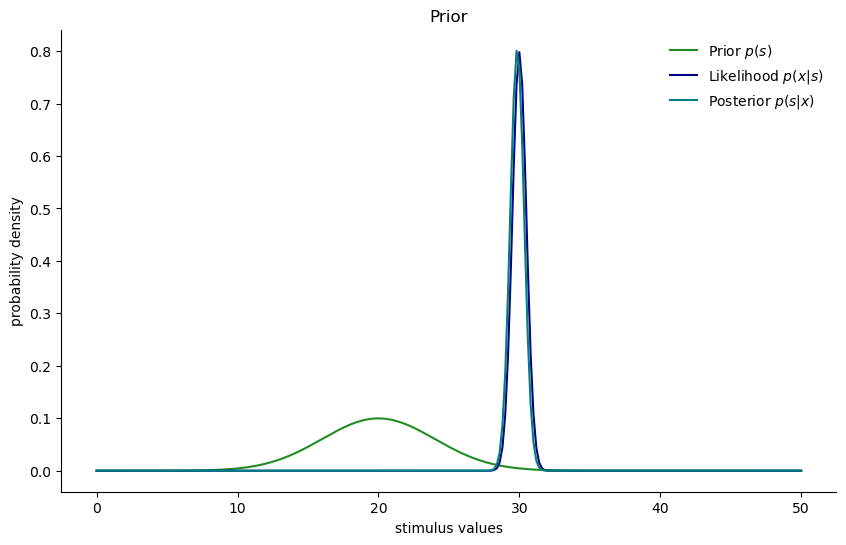

In [7]:
x_obs = 30
s = np.arange(0, 50.2, 0.2) 
likelihood = [gaussian_pdf(x_obs, x, 0.5) for x in s]
prior = gaussian_pdf(s, 20, 4)

# Step C
protoposterior = prior * likelihood
# Step F
posterior = protoposterior / np.sum(protoposterior)
# Step E
posterior /= 0.2
# Step F
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(s, prior, color='forestgreen', label="Prior $p(s)$")
ax.plot(s, likelihood, color='darkblue', label="Likelihood $p(x|s)$")
ax.plot(s, posterior, color='teal', label="Posterior $p(s|x)$")
ax.set_xlabel('stimulus values')
ax.set_ylabel('probability density')
ax.set_title('Prior')
ax.legend(frameon=False)
sns.despine()

When we make the likelihood have a very small variance, the opposite effect happens as described in pat H. The mean of the posterior is now heavily biased by the likelihood mean, since the variance is much lower in the likelihood relative to the prior. The variance will also be similar to the likelihood, as when we add the precicions, we have a high precision for the likelihood and a relatively low precision for the prior. Therefore, the precision will be slightly higher in the posterior compared to the likelihood, but if the difference in precision is so great between the likelihood and prior, they would be practically the same.

---
### Problem 3.3  

We expand on the previous problem by varying the stimulus distribution. Start with the code from the previous problem. Suppose the stimulus distribution $p_s(s)$ is uniform on the interval [−15, 25] and 0 outside this interval. The measurement distribution $p_{x|s}(x|s)$ is Gaussian with standard deviation $σ = 5$. A Bayesian observer infers s from an observed measurement $x_{obs} = 30$. We are again going to calculate the posterior probability density numerically.  

a) What is the value of $p(s)$ on the interval [−15, 25]?   
b) Repeat parts (a)-(f) from the previous problem for this new stimulus distribution.   
c) Is the posterior Gaussian? d) Numerically calculate the mean of the posterior.   
e) Numerically calculate the variance of the posterior.

**A**   
The value of s over the interval [-15, 25] is 1/40. Because our range is between -15 to 25, we know the probability distribution must equal 1 when integrated, so we can calculate the value of p(s) as 1/40.  

**B**

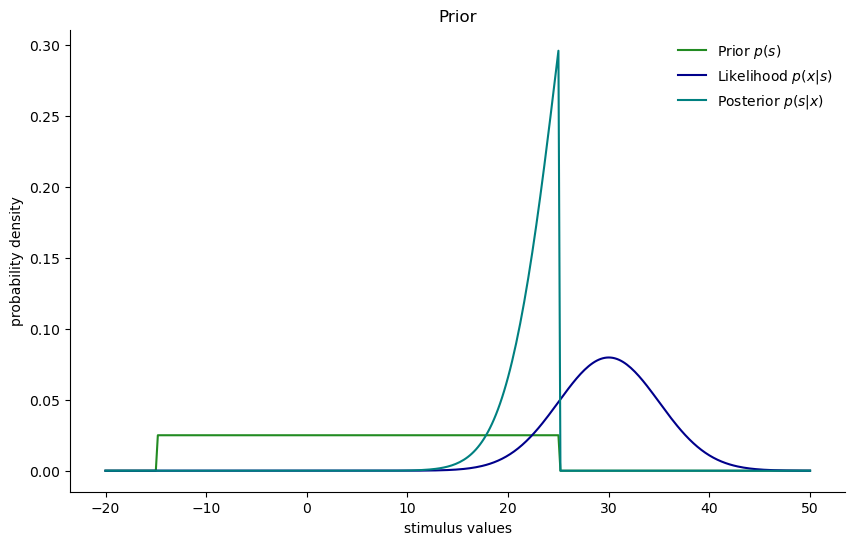

In [19]:

x_obs = 30 

# Set limits for uniform distribution
upper_limit = 25
lower_limit = -15
step_size = 0.2
dist_range = abs(upper_limit) + abs(lower_limit)
s = np.arange(-20, 50.2, step_size) 

uniform_dist = np.where((s >= lower_limit) & (s <= upper_limit), 1, 0)
prior = uniform_dist / dist_range

likelihood = [gaussian_pdf(x_obs, x, 5) for x in s]

protoposterior = likelihood * prior
posterior = protoposterior / np.sum(protoposterior)
posterior /= step_size

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(s, prior, color='forestgreen', label="Prior $p(s)$")
ax.plot(s, likelihood, color='darkblue', label="Likelihood $p(x|s)$")
ax.plot(s, posterior, color='teal', label="Posterior $p(s|x)$")
ax.set_xlabel('stimulus values')
ax.set_ylabel('probability density')
ax.set_title('Prior')
ax.legend(frameon=False)
sns.despine()



**C**  
The posterior is not gaussian.

**D and E**

In [20]:
post_mean = np.sum(posterior * s)*step_size
post_var = np.sum(posterior * (s - post_mean)**2)*step_size

print(f"Mean of the posterior: {round(post_mean,2)}")
print(f"Variance of the posterior: {round(post_var,2)}")

Mean of the posterior: 22.45
Variance of the posterior: 5.03


---
### Problem 3.5   

The figure below shows a likelihood function and a posterior distribution. Both are Gaussian, with σposterior = 1.2 and σlikelihood = 1.5. Assume that the prior is also Gaussian. Which of the following statements is true? Explain. You will need both the plot and the given numbers.   
a) The prior is centered to the left of the likelihood function and is narrower.  
b) The prior is centered to the left of the likelihood function and is wider than it.  
c) The prior is centered to the right of the likelihood function and is narrower than it.  
d) The prior is centered to the right of the likelihood function and is wider than it.

**Answer**
We can immediately remove answers C and D, as since the posterior must lie between the prior and the likelihood, the prior must be centered to the left of the likelihood function. Which leaves A and B. To determine if it is wider or narrower, we can calculate it through the following equations:   
$$J_{post} = J_{prior} + J_{likelihood}$$
therfore, we can calculate $J_{prior}$ as:
$$J_{prior} = J_{post} - J_{likelihood}$$
where  
$$J = \frac{1}{\sigma^2}$$


In [10]:
J_post = 1/(1.2**2)
J_like = 1/(1.5**2)
J_prior = J_post - J_like
sigma_prior = 1/J_prior
print(f"Sigma for the prior is {np.sqrt(sigma_prior)}")


Sigma for the prior is 2.0


As calculated above, $\sigma$ for the prior is 2 and $\sigma$ for the likelihood is 1.5, therefore, the prior would be wider than the likelihood.  
This leaves our final answer as B.

---   

# Questions from Kording and Wolpert (2004)  

**a. The model the authors use is essentially the same one we learned about in Chapter 3. Make sure this is clear to you by translating their variable names to the ones used in the textbook. That is, what takes the place of the stimulus, $s_{hyp}$, and what do they use for the measurement, $x_{obs}$? Do the same for the variances.**  


One of the main goals of the authors model is that the participants need to estimate the actual lateral shift ($x_{true}$) for the current trial, based on (potentially) noisy visual feedback ($x_{sensed}$). So this forms the likelihood $p(x_{sensed}|x_{true})$. From our textbooks examples, the stimulus ($s_{hyp}$) is equivalent to the true location of the lateral shift ($x_{true}$), while the measurment ($x_{obs}$) is equivalent to $x_{sensed}$. The authors test this, by manipulating the uncertainty of the visual feedback. The prior variance would be equal across all trials, which would be our variance in the stimulus ($s_{hyp}$) in the textbook, and the variance of the prior distribution of lateral shifts in the paper ($x_{true}$). The likelhiood variance is maniputed in this study by adding noise the the visual stimulus, which would increase the variance of the sensed location of the shift ($x_{sensed}$), or from our textbook, the the measurment ($x_{obs}$).

From the paper, the authors formalize their model as the following:
$$p(x_{true}|x_{sensed}) = \frac{p(x_{sensed}|x_{true})p(x_{true})}{p(x_{sensed})}$$

Our textbook formalizes the model as:

$$p(s_{hyp}|x_{obs}) = \frac{p(x_{obs}|s_{hyp})p(s_{hyp})}{p(x_{obs})}$$

We can see that based on the description above these equations are equivalent

---

**b. Note that $x_estimated$ (at the top of the fourth page of the article pdf) is the posterior mean estimate. However, their expression looks different than the one in the book. Convince yourself (i.e., prove) that the form used by Kording & Wolpert is mathematically equivalent to the expression from Chapter 3 (Eqns 3.24, 3.28).**

From the paper:  
$$x_{estimated} = \frac{\sigma_{sensed}^2}{\sigma_{sensed}^2 + \sigma_{prior}^2}[1cm] + \frac{\sigma_{prior}^2}{\sigma_{sensed}^2 + \sigma_{prior}^2}x_{sensed}$$

Equation 3.24 from the textbook:  
$$\mu_{post} = \frac{J_{obs}x_{obs}+J_{prior}\mu}{J_{obs} + J_{prior}}$$

which can be rewritten as
$$\mu_{post} =  \frac{J_{prior}}{J_{obs} + J_{prior}}\mu + \frac{J_{obs}}{J_{obs} + J_{prior}}x_{obs} $$

If we change the equation from the paper into precision format we get thew following:
$$x_{estimated} = \frac{\frac{1}{J_{sensed}}}{\frac{1}{J_{sensed}} + \frac{1}{J_{prior}}}[1cm] + \frac{\frac{1}{J_{prior}}}{\frac{1}{J_{sensed}} + \frac{1}{J_{prior}}}x_{sensed}$$
Which leads to
$$x_{estimated} = \frac{\frac{1}{J_{sensed}}}{\frac{J_{prior}+J_{sensed}}{J_{sensed}J_{prior}}}[1cm] + \frac{\frac{1}{J_{prior}}}{\frac{J_{prior}+J_{sensed}}{J_{sensed}J_{prior}}}x_{sensed}$$
Which can be further simplified to
$$\frac{J_{prior}}{J_{prior}+J_{sensed}}[1cm] + \frac{J_{sensed}}{J_{prior}+J_{sensed}}x_{sensed}$$

Which is equivalent to our previous equation
$$\mu_{post} =  \frac{J_{prior}}{J_{obs} + J_{prior}}\mu + \frac{J_{obs}}{J_{obs} + J_{prior}}x_{obs} $$

--- 
 

### Bonus
**The authors make a technically incorrect statement following the first equation in the "Bayesian estimation" section of the Methods.  The incorrect phrase they use is "where p(x_sensed|x_true) is the likelihood of perceiving x_sensed". What's wrong with this phrase and how should it be written?**   
From box 3.5 *The likelihood of what?. A likelihood function is numerically equal to a conditional probability, but is always a function of the variable after the “|” sign (for us the world state). It is common but incorrect to say “the likelihood of the measurements” or “the likelihood of the observations”. The correct terminology is “the probability of the measurements (given a world state)” and “the likelihood of the world state (given the measurements)”.*   

The authors state the likelihood of perceiving $x_{sensed}$, which is incorrect as the likelihood is always a function of the world state not the measurement. So the correct way they should have written it would be either the probability of perceiving $x_{sensed}$ (given the true location of the stimulus) or the likelihood or the likelihood of the true location of the stimulus (given $x_{sensed}$).


**Immediately following the equation for the posterior mean estimate, the authors state that "we can estimate the uncertainty in the feedback $\sigma_\text{sensed}$ by linear regression from Fig. 2a. Explain this, meaning: put it into the form of a regression model, explain what is known/unknown, where each variable comes from, and how you would solve?**  




